### Importance of Python, Machine Learning, and AI

Python has emerged as the dominant language in Machine Learning and AI development due to its readability, community support, and powerful libraries. By integrating these libraries seamlessly, Python allows data scientists and ML engineers to prototype, test, and deploy models efficiently.


#### NumPy – The Foundation of ML Frameworks

NumPy provides the fundamental data structures (n-dimensional arrays) and numerical computation routines that power most ML workflows. It serves as the low-level engine behind higher-level frameworks:

**TensorFlow** and **PyTorch** use NumPy-like data structures to handle tensor operations efficiently.
Scikit-learn provides classical machine learning algorithms (like regression, classification, clustering) and easy-to-use APIs for model training, evaluation, and hyperparameter tuning. It remains a core library for smaller or more traditional ML tasks.

#### Pandas – Data Handling and Manipulation

**Pandas** excels at tabular data manipulation. Whether it’s merging datasets, handling missing values, or performing quick statistical summaries, Pandas is indispensable for data preparation stages before feeding it into ML models.

#### Matplotlib & Seaborn – Data Visualization

**Matplotlib** is the original plotting library that allows the customisation of plots for thorough data exploration.
Seaborn builds on Matplotlib by offering more advanced statistical plots and streamlined code syntax, making visualising the distribution and relationship of data points easier.

### TensorFlow

While multiple deep learning frameworks are available, we will use TensorFlow throughout this module. TensorFlow offers:

- **Automatic Differentiation:** Streamlines gradient-based optimisation using computational graphs and tf.GradientTape().
- **Wide Ecosystem:** Includes Keras (a high-level API), TensorBoard for visualisation, and deployment options across different platforms.

#### Computing a Gradient of a Linear Equation with Sigmoidal Activation in TensorFlow

A typical operation in deep learning is computing gradients of a loss function concerning parameters (weights and biases).

- Implement a TensorFlow-based computation of the gradient of a given vector function.
- Generate a graphical visualisation to demonstrate the correctness of the computed gradient.
- Analyse and explain the relationship between the function and its gradient using the visualisation.
- Share the code, results, and interpretation on the designated discussion forum.

**Theory:** 
- https://es.mathworks.com/help/deeplearning/ug/detect-vanishing-gradients-in-deep-neural-networks.html
- https://www.tensorflow.org/guide/autodiff

Implement a TensorFlow-based computation for the gradient of a linear equation using a sigmoidal activation function. Generate a graphical visualization to verify its correctness and analyze the relationship between the function and its gradient.

$  f(x) = \sigma(w x + b)  $, where $  \sigma(z) = \frac{1}{1 + e^{-z}}  $, is  $  \frac{df}{dx} = w \cdot \sigma(z) \cdot (1 - \sigma(z))  $

- With $  w = 1.5  $ and $  b = -1.0  $, the maximum gradient value is $  \frac{w}{4} = 0.375  $, occurring when $  z = 0  $ or $  x = \frac{1}{1.5} \approx 0.667  $.

The visualization illustrates the accuracy of the computed gradient by overlaying the function with its derivative. The sigmoid function displays an S-shaped curve: it approaches 0 for large negative values of x (e.g., x = -10, where f is approximately 0), rises steeply around x = 0.67 (where z = 0), and approaches 1 for large positive values of x (e.g., x = 10, where f is approximately 1). The gradient, calculated using TensorFlow, forms a bell-shaped curve that starts near 0, peaks at approximately 0.375 when x is around 0.65 (close to the analytical value of 0.667), and then returns to 0. This peak occurs at the inflection point of the sigmoid function, where the function changes most rapidly. This makes it highly sensitive to variations in input—an essential characteristic for neural networks when learning features.

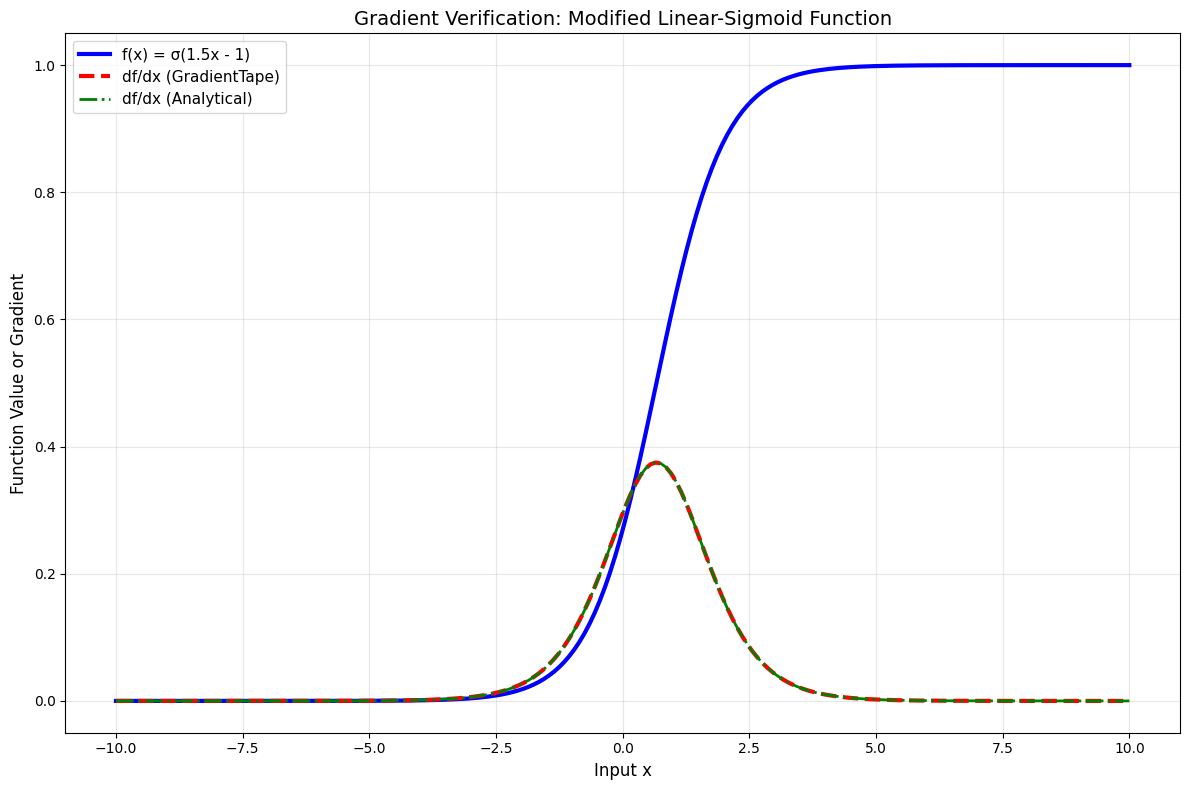

In [28]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Define parameters as trainable variables
w = tf.Variable(1.5, dtype=tf.float32, name="weight")
b = tf.Variable(-1.0, dtype=tf.float32, name="bias")

# Define the linear-sigmoid function
def linear_sigmoid(x):
    z = w * x + b  # Linear transformation
    return tf.sigmoid(z)  # Sigmoid activation

# Generate input domain
x_domain = tf.linspace(-10.0, 10.0, 200)

# Compute function values and gradients using GradientTape
with tf.GradientTape() as tape:
    tape.watch(x_domain)  # Watch the input tensor
    f_values = linear_sigmoid(x_domain)

gradients = tape.gradient(f_values, x_domain)  # Computed df/dx

# Analytical gradient for verification: df/dx = w * sigmoid(z) * (1 - sigmoid(z))
analytical_grad = w * f_values * (1 - f_values)

# Plot for visual verification
plt.figure(figsize=(12, 8))
plt.plot(x_domain, f_values, 'b-', linewidth=3, label='f(x) = σ(1.5x - 1)')
plt.plot(x_domain, gradients, 'r--', linewidth=3, label='df/dx (GradientTape)')
plt.plot(x_domain, analytical_grad, 'g-.', linewidth=2, label='df/dx (Analytical)')
plt.xlabel('Input x', fontsize=12)
plt.ylabel('Function Value or Gradient', fontsize=12)
plt.title('Gradient Verification: Modified Linear-Sigmoid Function', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('gradient_verification_graph.png', dpi=300)
plt.show()

In [30]:
x = tf.Variable(3.0)

with tf.GradientTape() as tape:
  y = x**2

# dy = 2x * dx
dy_dx = tape.gradient(y, x)
dy_dx.numpy()

np.float32(6.0)

In [31]:
w = tf.Variable(tf.random.normal((3, 2)), name='w')
b = tf.Variable(tf.zeros(2, dtype=tf.float32), name='b')
x = [[1., 2., 3.]]

with tf.GradientTape(persistent=True) as tape:
  y = x @ w + b
  loss = tf.reduce_mean(y**2)

In [32]:
[dl_dw, dl_db] = tape.gradient(loss, [w, b])
print(w.shape)
print(dl_dw.shape)

(3, 2)
(3, 2)


In [33]:
my_vars = {
    'w': w,
    'b': b
}

grad = tape.gradient(loss, my_vars)
grad['b']

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 6.603486 , -6.1815386], dtype=float32)>

In [34]:
# Gradients of non-scalar targets

x = tf.Variable(2.0)
with tf.GradientTape(persistent=True) as tape:
  y0 = x**2
  y1 = 1 / x

print(tape.gradient(y0, x).numpy())
print(tape.gradient(y1, x).numpy())

4.0
-0.25


The following code computes the sigmoid function $  y = \sigma(x) = \frac{1}{1 + e^{-x}}  $ and its derivative over $  x \in [-10, 10]  $ using TensorFlow's automatic differentiation, then plots them with Matplotlib.

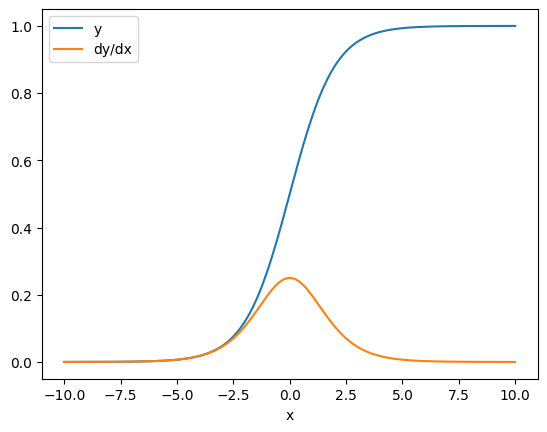

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

x = tf.linspace(-10.0, 10.0, 200+1)

with tf.GradientTape() as tape:
  tape.watch(x)
  y = tf.nn.sigmoid(x)

dy_dx = tape.gradient(y, x)

plt.plot(x, y, label='y')
plt.plot(x, dy_dx, label='dy/dx')
plt.title()
plt.legend()
_ = plt.xlabel('x')

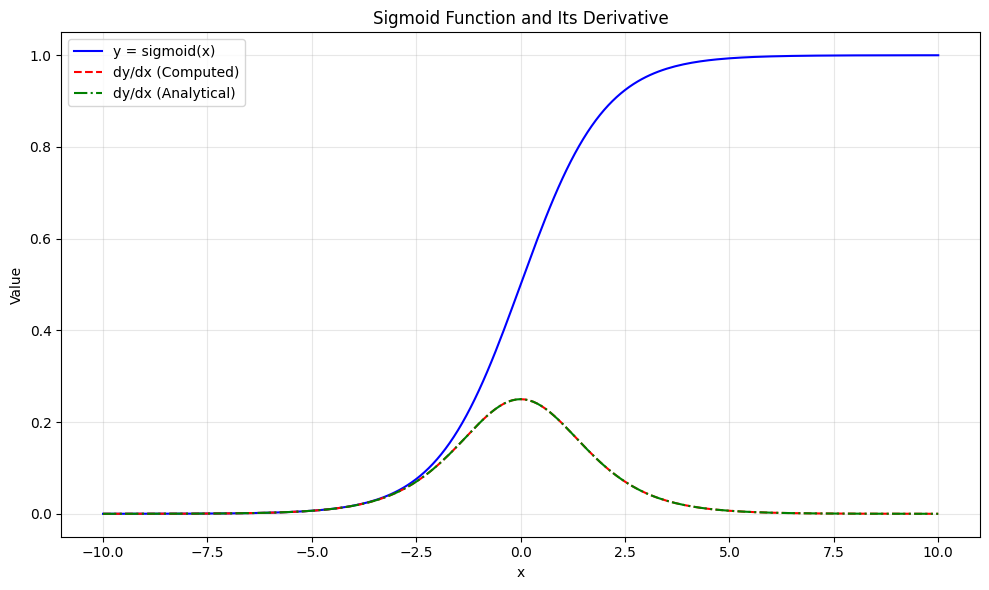

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Generate input values
x = tf.linspace(-10.0, 10.0, 201)

# Compute sigmoid and gradient using GradientTape
with tf.GradientTape() as tape:
    tape.watch(x)  # Watch the input tensor
    y = tf.nn.sigmoid(x)  # Sigmoid function

dy_dx = tape.gradient(y, x)  # Computed derivative

# Analytical derivative for verification
analytical_dy_dx = y * (1 - y)

# Convert to NumPy for plotting
x_np = x.numpy()
y_np = y.numpy()
dy_dx_np = dy_dx.numpy()
analytical_np = analytical_dy_dx.numpy()

# Plot with improvements
plt.figure(figsize=(10, 6))
plt.plot(x_np, y_np, 'b-', label='y = sigmoid(x)')
plt.plot(x_np, dy_dx_np, 'r--', label='dy/dx (Computed)')
plt.plot(x_np, analytical_np, 'g-.', label='dy/dx (Analytical)')
plt.title('Sigmoid Function and Its Derivative')
plt.xlabel('x')
plt.ylabel('Value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()